In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from pandas.tseries.offsets import DateOffset
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,7)
sns.set()

In [1]:
# from google.colab import files
# files.upload()

In [ ]:
df = pd.read_csv("AirQuality.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(inplace=True)
df.head()

,Date,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone
0,01-01-2016 00:00,3.11,6.98,372.96,135.81,619.65,360.81,750.91,53.72,0.55,188.51,14.74
1,02-01-2016 00:00,1.77,2.60,161.81,111.45,320.25,327.92,616.04,50.82,0.81,198.27,18.88
2,03-01-2016 00:00,2.22,3.54,335.01,129.56,565.62,341.32,651.71,55.87,0.96,251.82,15.67
3,04-01-2016 00:00,4.58,11.36,463.67,149.34,764.87,480.07,692.40,55.63,0.77,160.64,30.63
4,05-01-2016 00:00,3.21,11.44,308.38,136.74,542.97,433.35,847.84,55.46,0.95,144.11,32.07


In [ ]:
df.index = pd.to_datetime(df['Date'], format = '%d-%m-%Y %H:%M', errors='coerce')
df= df.drop(['Date'], axis=1)
df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone
Date,,,,,,,,,,,
2016-01-01,3.11,6.98,372.96,135.81,619.65,360.81,750.91,53.72,0.55,188.51,14.74
2016-01-02,1.77,2.60,161.81,111.45,320.25,327.92,616.04,50.82,0.81,198.27,18.88
2016-01-03,2.22,3.54,335.01,129.56,565.62,341.32,651.71,55.87,0.96,251.82,15.67
2016-01-04,4.58,11.36,463.67,149.34,764.87,480.07,692.40,55.63,0.77,160.64,30.63
2016-01-05,3.21,11.44,308.38,136.74,542.97,433.35,847.84,55.46,0.95,144.11,32.07


Resample dataset month-wise

In [ ]:
dfm = df.resample('M').mean()
dfm.head(n=50)
dfm.describe()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,7.416080,31.098008,88.665676,86.511624,160.934311,135.179769,326.980237,52.490924,1.400104,181.404619,32.320646
std,6.064067,21.842508,57.235515,33.583787,111.113126,87.763265,147.074790,14.729919,1.027273,42.190576,15.298798
min,0.670000,3.910000,4.429667,21.210000,2.310000,28.828065,51.470968,2.504839,0.381613,81.240000,9.570000
25%,2.705301,15.815000,46.249516,55.824833,86.539776,58.260952,243.755968,46.965806,0.772903,146.799032,23.593387
50%,5.434333,27.196129,73.441613,91.400000,128.711667,111.642581,328.167333,52.403548,1.057419,191.443226,28.623333
75%,11.141505,40.367296,125.916478,103.890714,216.771129,178.068092,416.754032,62.965000,1.546129,215.440645,36.063226
max,27.624138,95.038387,287.882333,177.337857,505.135667,333.869667,801.567333,76.522903,4.670000,240.097419,86.405161


Dicky-Fuller Test function

In [ ]:
def dicky_fuller_test(col):
  print("--------------------"+col.name+"------------------------------")
  dftest = adfuller(col, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['TEST STATISTIC', 'P-VALUE', 'LAGS-USED', 'N. OF OBSERVATIONS USED'])
  for key, value in dftest[4].items():
    dfoutput['CRITICAL VAL (%s)'%key] = value
  if dfoutput[1] <= 0.05:
    print('Data is stationary')
  else:
    print("Data is not stationary")
  print(dfoutput)

PACF and ACF plot function

In [ ]:
def plotting_cf(col):
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(211)
  fig = plot_acf(col, lags=30,ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(col, lags=30,ax=ax2)

Get p value using min BIC


In [ ]:
def bic_plot(col):
  BIC = np.zeros(10)
  for p in range(10):
      mod = ARMA(col, order=(p,0))
      res = mod.fit()
  # Save BIC for AR(p)    
      BIC[p] = res.bic
      
  # Plot the BIC as a function of p
  plt.plot(range(1,10), BIC[1:10], marker='o')
  plt.xlabel('Order of AR Model')
  plt.ylabel('Bayesian Information Criterion')
  plt.show()

Store prediction 

In [ ]:
future_dates=[df.index[-22]+ DateOffset(months=x)for x in range(0, 62)]
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_datest_df

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Benzene

In [ ]:
dicky_fuller_test(dfm.Benzene)

--------------------Benzene------------------------------
Data is not stationary
TEST STATISTIC             -2.744501
P-VALUE                     0.066649
LAGS-USED                   0.000000
N. OF OBSERVATIONS USED    58.000000
CRITICAL VAL (1%)          -3.548494
CRITICAL VAL (5%)          -2.912837
CRITICAL VAL (10%)         -2.594129
dtype: float64


Since data is not station we will make it stationary by performing differencing


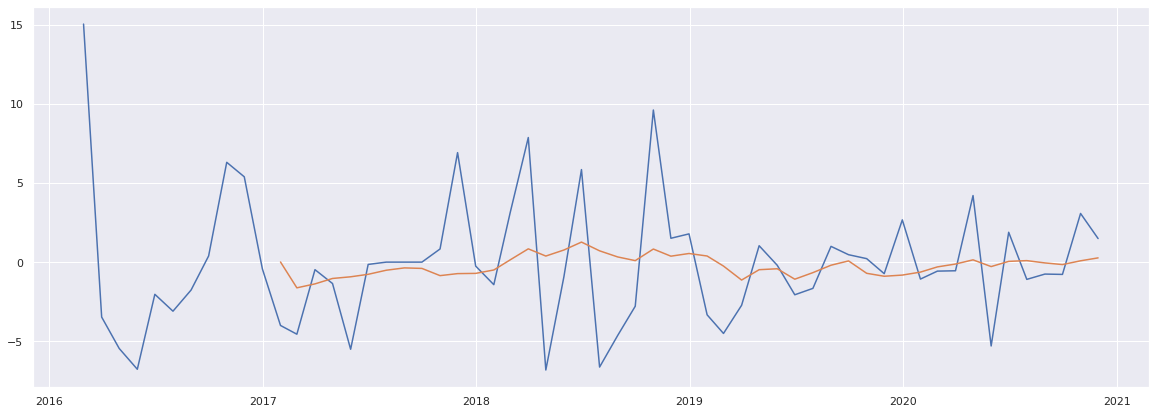

In [ ]:
_ = plt.plot(dfm['Benzene'].diff())
_ = plt.plot(dfm['Benzene'].diff().rolling(window=12).mean())
plt.show()

Differencing of lag-1  makes the data stationary 

In [ ]:
dfm['Benzene_Diff'] = dfm['Benzene'] - dfm['Benzene'].shift(1)
dfm.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Benzene_Diff
Date,,,,,,,,,,,,
2016-01-31,12.595484,30.059032,197.272903,97.664839,355.764516,330.114839,580.817097,62.709677,1.033548,193.268065,17.427097,NaN
2016-02-29,27.624138,71.667931,142.748966,86.643793,271.876207,177.015862,296.894828,49.750345,1.417586,202.155517,28.626207,15.028654
2016-03-31,24.154516,57.196774,128.121290,84.961290,250.685161,136.644194,287.900000,42.519677,1.571935,232.777097,27.174516,-3.469622
2016-04-30,18.703000,42.168667,159.617000,95.732667,301.762333,144.850667,393.845333,23.225333,1.969667,234.973333,32.463333,-5.451516
2016-05-31,11.939032,34.720323,56.942258,67.709032,138.078710,100.469032,427.134516,36.914839,2.838387,142.328387,27.775806,-6.763968


In [ ]:
# dfm = dfm.drop(['Benzene_Diff'], axis=1)
dicky_fuller_test(dfm.Benzene_Diff.dropna())

--------------------Benzene_Diff------------------------------
Data is stationary
TEST STATISTIC            -6.136374e+00
P-VALUE                    8.168355e-08
LAGS-USED                  1.000000e+00
N. OF OBSERVATIONS USED    5.600000e+01
CRITICAL VAL (1%)         -3.552928e+00
CRITICAL VAL (5%)         -2.914731e+00
CRITICAL VAL (10%)        -2.595137e+00
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


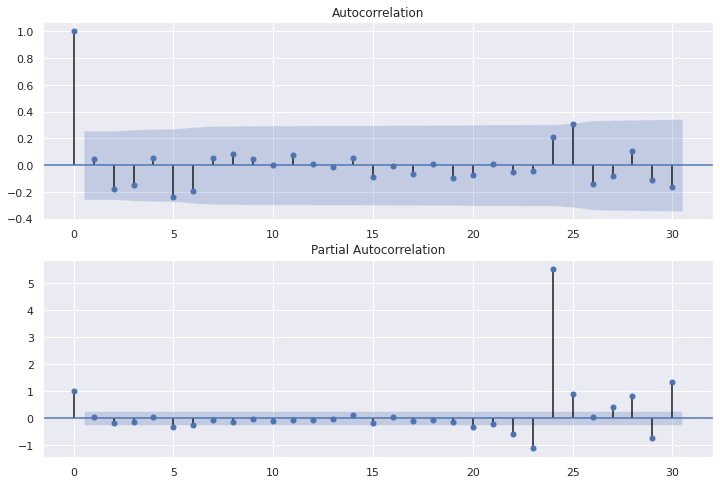

In [ ]:
plotting_cf(dfm.Benzene_Diff.dropna())

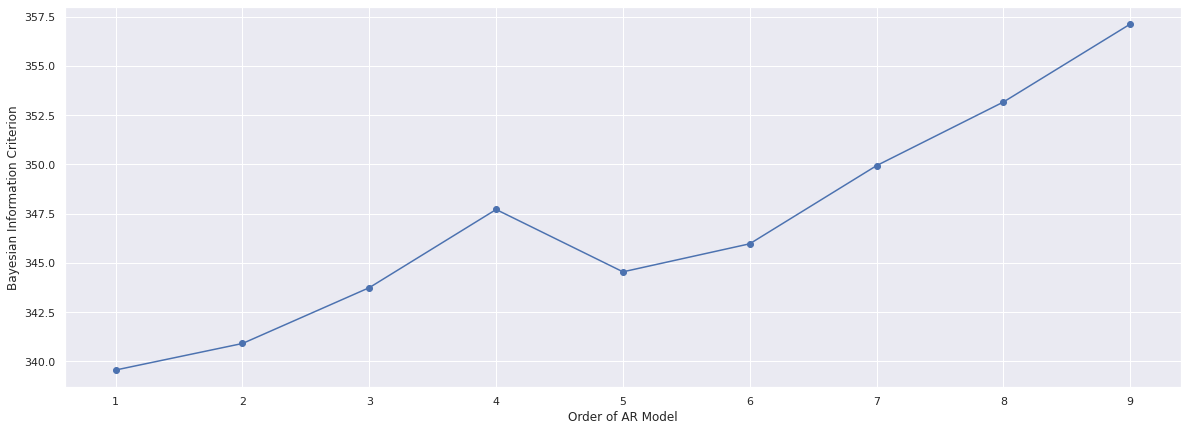

In [ ]:
bic_plot(dfm.Benzene_Diff.dropna())

In [ ]:
model=ARIMA(dfm.Benzene.dropna(),order=(2,1,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const             -0.163740
ar.L1.D.Benzene    0.084003
ar.L2.D.Benzene   -0.245329
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Benzene   No. Observations:                   58
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -162.334
Method:                       css-mle   S.D. of innovations              3.970
Date:                Wed, 09 Dec 2020   AIC                            332.668
Time:                        04:50:18   BIC                            340.910
Sample:                    02-29-2016   HQIC                           335.879
                         - 11-30-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1637      0.454     -0.361      0.720      -1.053       0.725
ar.L1.D.Benzene     0.0840      0.147      0.570      0.571      -0.205       0.373
ar.L2.D.Benzene    -0.2453      0.147     -1.672      0.100      -0.533       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1712           -2.0117j            2.0189           -0.2365
AR.2            0.1712           +2.0117j            2.0189            0.2365
-----------------------------------------------------------------------------
"""

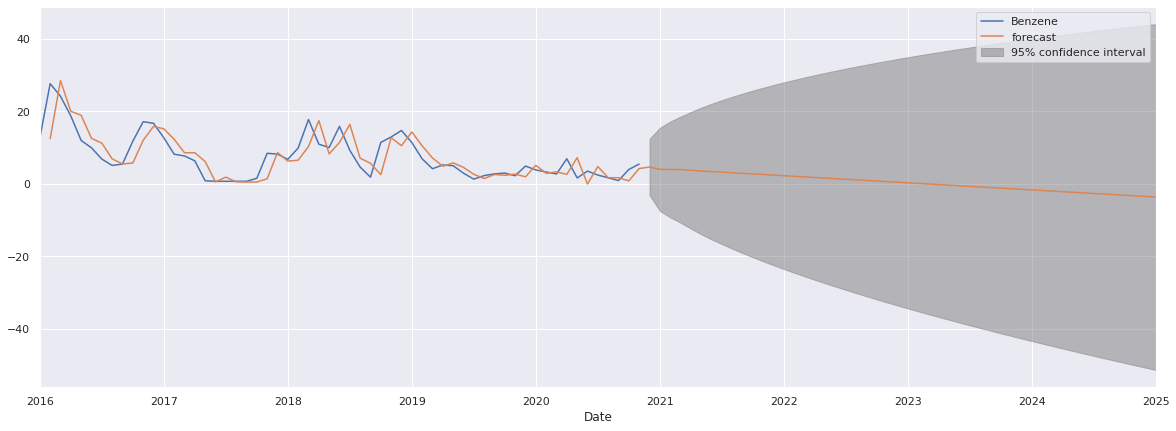

In [ ]:
fig, ax = plt.subplots()
ax = dfm['Benzene'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['Benzene'] = model_fit.forecast(steps = 61)[0]

In [ ]:
future_datest_df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone
2020-12-01,4.604753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01,3.980880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,3.939214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,3.898612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,3.715268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


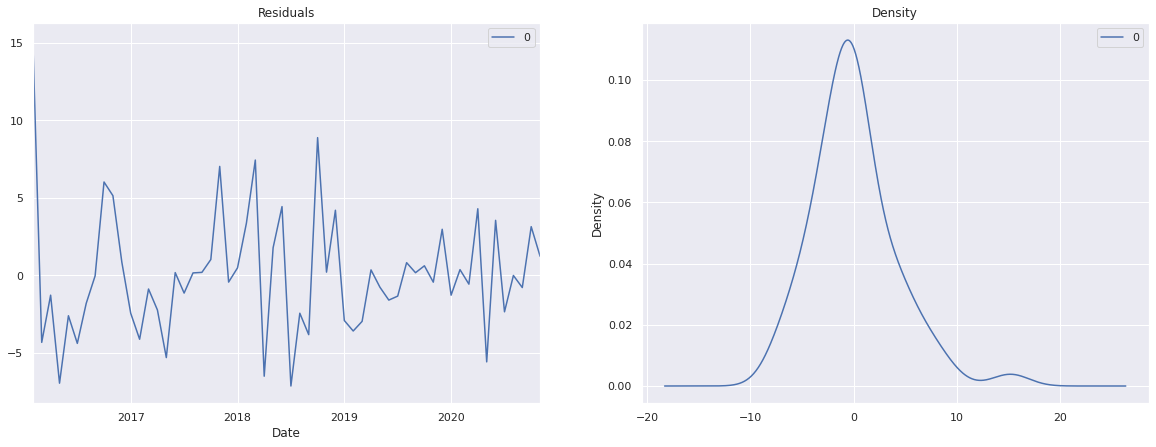

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#Toulene

In [ ]:
dicky_fuller_test(dfm.Toluene)

--------------------Toluene------------------------------
Data is stationary
TEST STATISTIC             -3.604399
P-VALUE                     0.005677
LAGS-USED                   0.000000
N. OF OBSERVATIONS USED    58.000000
CRITICAL VAL (1%)          -3.548494
CRITICAL VAL (5%)          -2.912837
CRITICAL VAL (10%)         -2.594129
dtype: float64


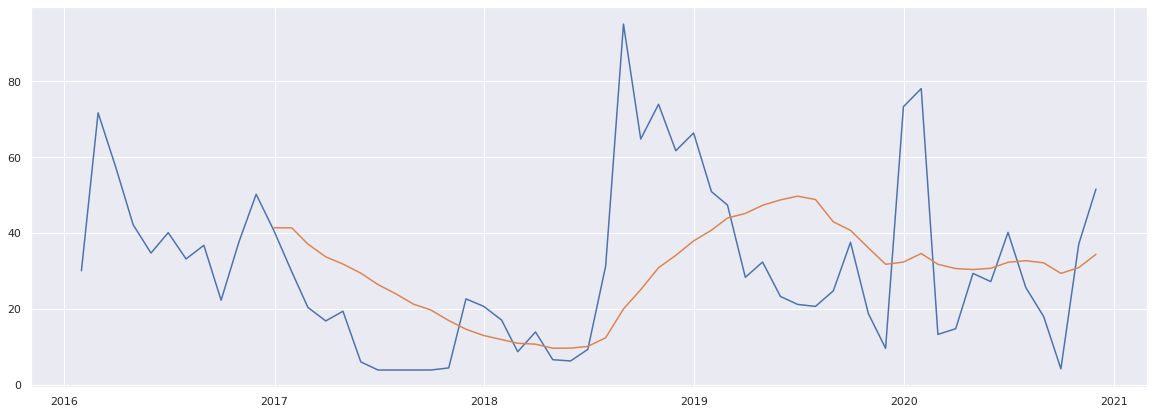

In [ ]:
_ = plt.plot(dfm['Toluene'])
_ = plt.plot(dfm['Toluene'].rolling(window=12).mean())
plt.show()

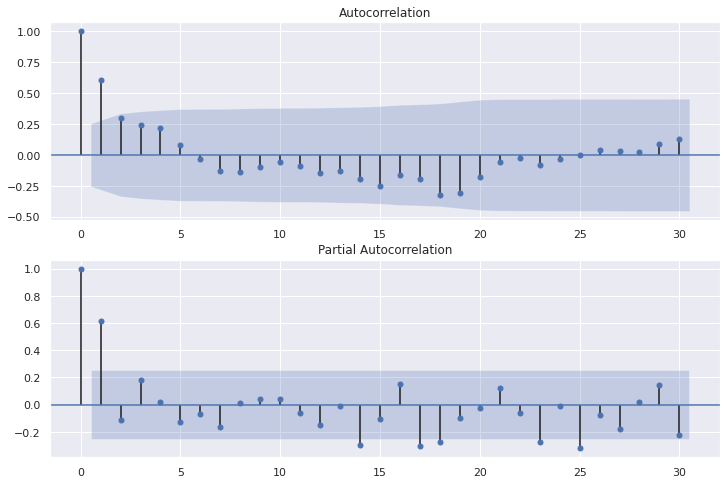

In [ ]:
plotting_cf(dfm.Toluene)

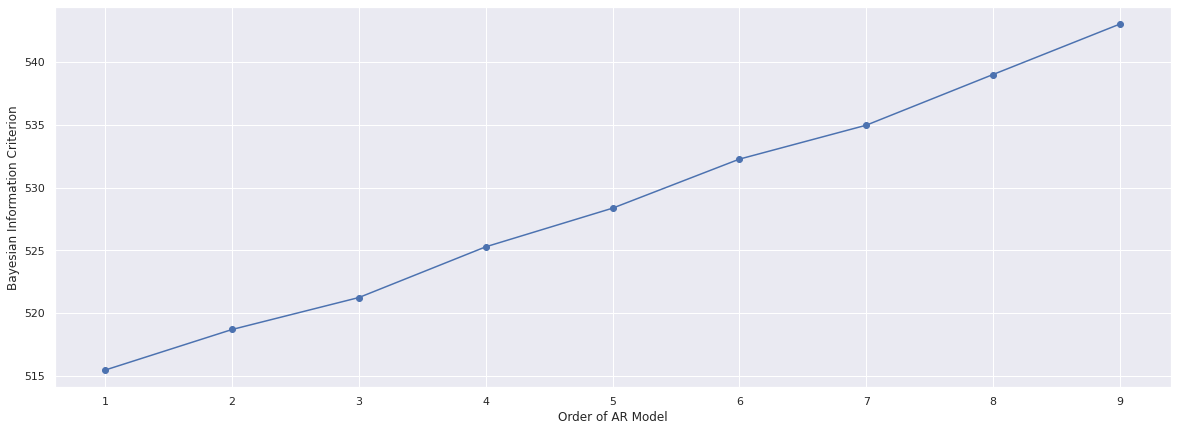

In [ ]:
bic_plot(dfm.Toluene)

In [ ]:
model=ARIMA(dfm.Toluene,order=(1,0,1))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const            31.220243
ar.L1.Toluene     0.426172
ma.L1.Toluene     0.288098
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Toluene   No. Observations:                   59
Model:                     ARMA(1, 1)   Log Likelihood                -250.925
Method:                       css-mle   S.D. of innovations             16.939
Date:                Wed, 09 Dec 2020   AIC                            509.851
Time:                        04:51:41   BIC                            518.161
Sample:                    01-31-2016   HQIC                           513.095
                         - 11-30-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.2202      4.876      6.402      0.000      21.663      40.778
ar.L1.Toluene     0.4262      0.190      2.243      0.029       0.054       0.799
ma.L1.Toluene     0.2881      0.208      1.384      0.172      -0.120       0.696
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3465           +0.0000j            2.3465            0.0000
MA.1           -3.4710           +0.0000j            3.4710            0.5000
-----------------------------------------------------------------------------
"""

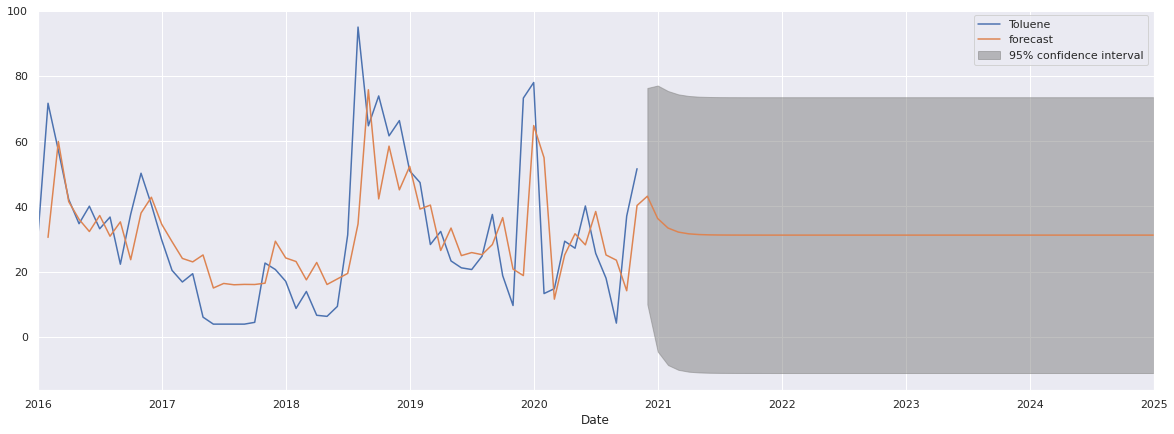

In [ ]:
fig, ax = plt.subplots()
ax = dfm['Toluene'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['Toluene'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Toluene2
2020-12-01,4.604753,43.153717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.153717
2021-01-01,3.980880,36.305954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.305954
2021-02-01,3.939214,33.387630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.387630
2021-03-01,3.898612,32.143922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.143922
2021-04-01,3.715268,31.613889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.613889


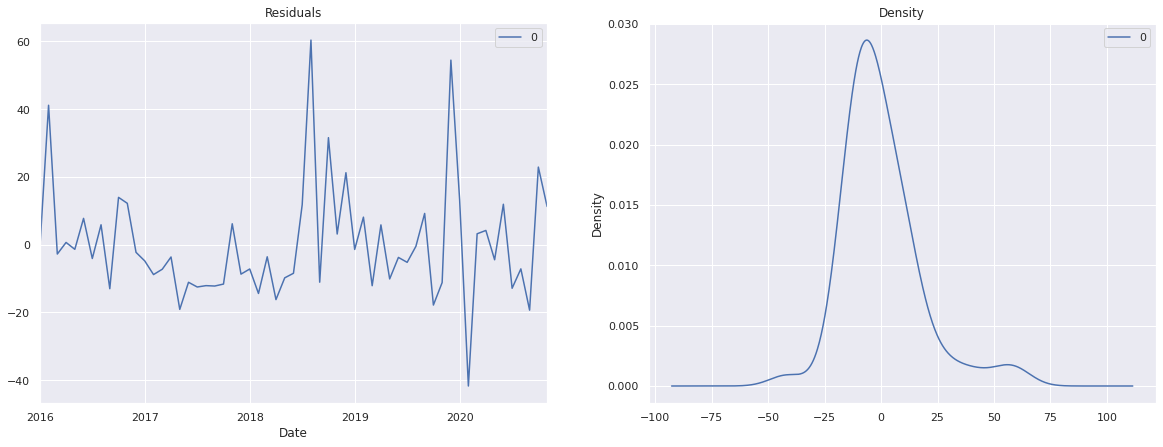

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#NO

In [ ]:
dicky_fuller_test(dfm.NO)

--------------------NO------------------------------
Data is not stationary
TEST STATISTIC             -2.059793
P-VALUE                     0.260986
LAGS-USED                   9.000000
N. OF OBSERVATIONS USED    49.000000
CRITICAL VAL (1%)          -3.571472
CRITICAL VAL (5%)          -2.922629
CRITICAL VAL (10%)         -2.599336
dtype: float64


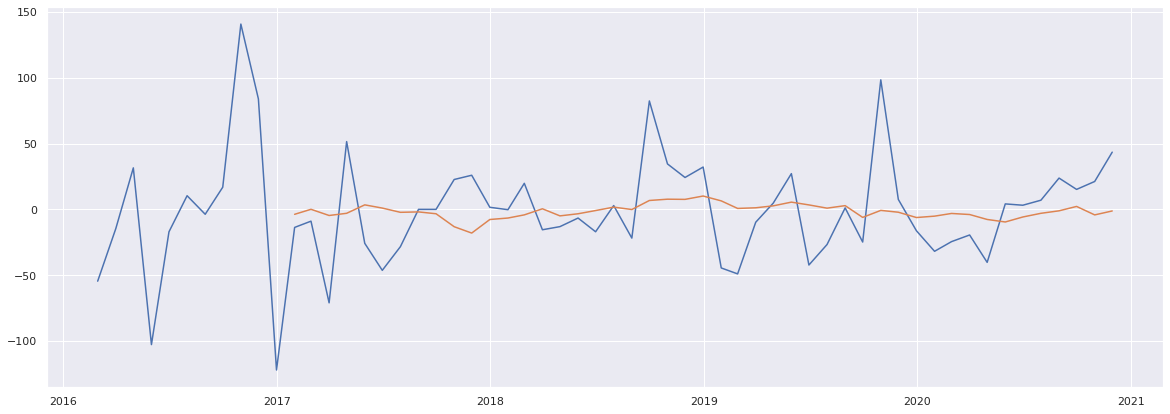

In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Benzene_Diff,NO_Diff
Date,,,,,,,,,,,,,
2016-01-31,12.595484,30.059032,197.272903,97.664839,355.764516,330.114839,580.817097,62.709677,1.033548,193.268065,17.427097,NaN,NaN
2016-02-29,27.624138,71.667931,142.748966,86.643793,271.876207,177.015862,296.894828,49.750345,1.417586,202.155517,28.626207,15.028654,-54.523938
2016-03-31,24.154516,57.196774,128.121290,84.961290,250.685161,136.644194,287.900000,42.519677,1.571935,232.777097,27.174516,-3.469622,-14.627675
2016-04-30,18.703000,42.168667,159.617000,95.732667,301.762333,144.850667,393.845333,23.225333,1.969667,234.973333,32.463333,-5.451516,31.495710
2016-05-31,11.939032,34.720323,56.942258,67.709032,138.078710,100.469032,427.134516,36.914839,2.838387,142.328387,27.775806,-6.763968,-102.674742


In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

--------------------NO_Diff------------------------------
Data is stationary
TEST STATISTIC             -4.584706
P-VALUE                     0.000138
LAGS-USED                   8.000000
N. OF OBSERVATIONS USED    49.000000
CRITICAL VAL (1%)          -3.571472
CRITICAL VAL (5%)          -2.922629
CRITICAL VAL (10%)         -2.599336
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


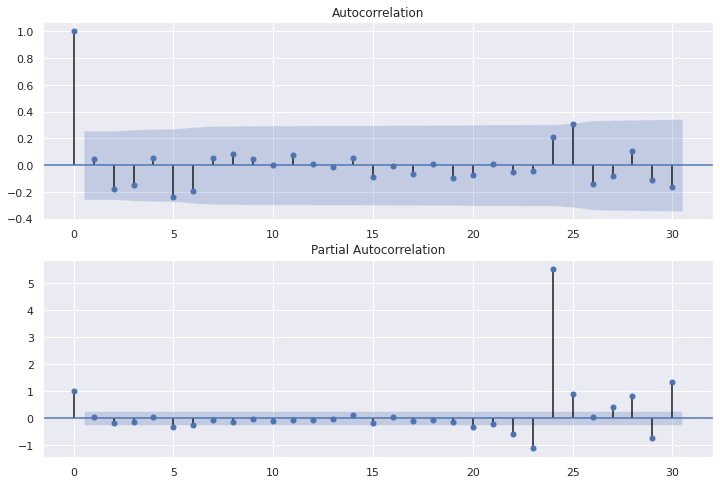

In [ ]:
plotting_cf(dfm.NO_Diff.dropna())

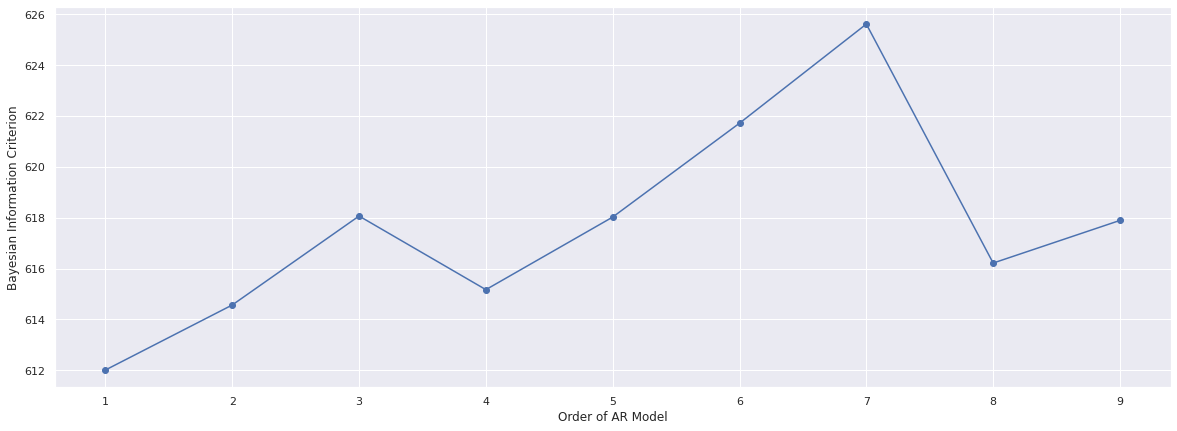

In [ ]:
bic_plot(dfm.NO_Diff.dropna())

In [ ]:
model=ARIMA(dfm.NO,order=(8,1,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const        -0.977538
ar.L1.D.NO    0.102291
ar.L2.D.NO   -0.288081
ar.L3.D.NO    0.062979
ar.L4.D.NO   -0.535654
ar.L5.D.NO   -0.088273
ar.L6.D.NO   -0.215208
ar.L7.D.NO    0.090453
ar.L8.D.NO   -0.467941
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.NO   No. Observations:                   58
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -287.806
Method:                       css-mle   S.D. of innovations             33.733
Date:                Wed, 09 Dec 2020   AIC                            595.613
Time:                        05:01:48   BIC                            616.217
Sample:                    02-29-2016   HQIC                           603.639
                         - 11-30-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9775      2.005     -0.488      0.628      -4.907       2.952
ar.L1.D.NO     0.1023      0.116      0.884      0.381      -0.125       0.329
ar.L2.D.NO    -0.2881      0.118     -2.446      0.018      -0.519      -0.057
ar.L3.D.NO     0.0630      0.120      0.524      0.603      -0.173       0.299
ar.L4.D.NO    -0.5357      0.127     -4.217      0.000      -0.785      -0.287
ar.L5.D.NO    -0.0883      0.123     -0.717      0.477      -0.329       0.153
ar.L6.D.NO    -0.2152      0.123     -1.751      0.086      -0.456       0.026
ar.L7.D.NO     0.0905      0.118      0.768      0.446      -0.140       0.321
ar.L8.D.NO    -0.4679      0.115     -4.071      0.000      -0.693      -0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9488           -0.5615j            1.1025           -0.4149
AR.2           -0.9488           +0.5615j            1.1025            0.4149
AR.3           -0.4071           -0.9880j            1.0686           -0.3122
AR.4           -0.4071           +0.9880j            1.0686            0.3122
AR.5            0.9258           -0.5685j            1.0864           -0.0876
AR.6            0.9258           +0.5685j            1.0864            0.0876
AR.7            0.5268           -1.0134j            1.1421           -0.1737
AR.8            0.5268           +1.0134j            1.1421            0.1737
-----------------------------------------------------------------------------
"""

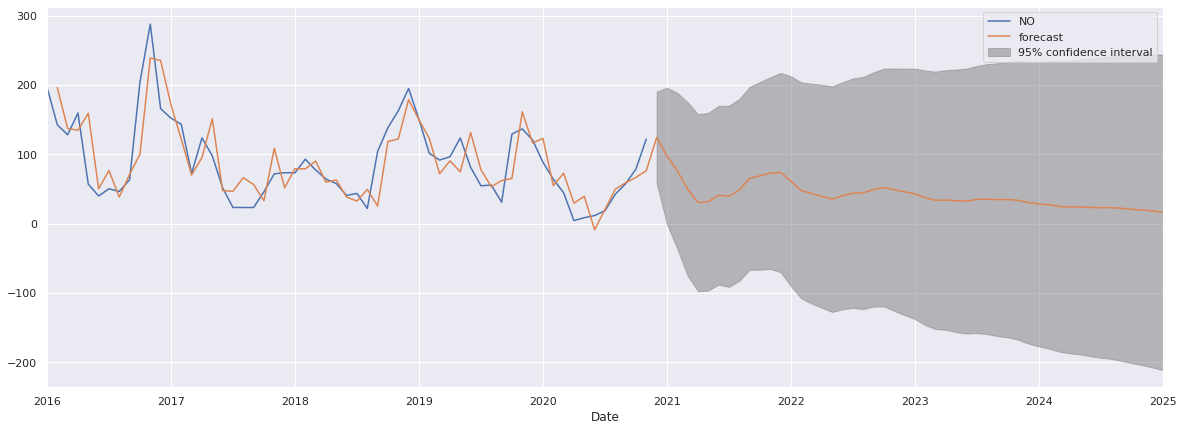

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Toluene2
2020-12-01,4.604753,124.352051,124.352051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.153717
2021-01-01,3.980880,97.751794,97.751794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.305954
2021-02-01,3.939214,76.216166,76.216166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.387630
2021-03-01,3.898612,50.037011,50.037011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.143922
2021-04-01,3.715268,30.289489,30.289489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.613889


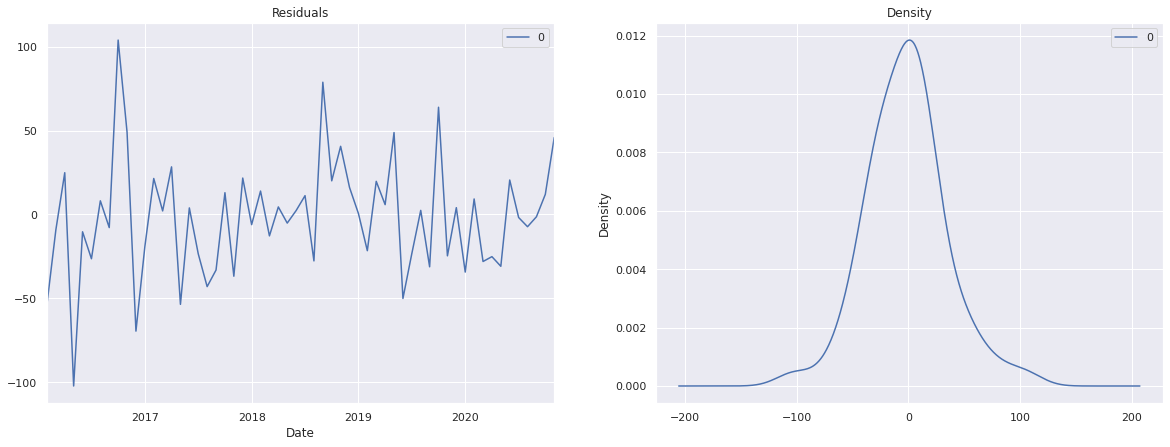

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#NO2

In [ ]:
dicky_fuller_test(dfm.NO2)

--------------------NO2------------------------------
Data is stationary
TEST STATISTIC             -3.651922
P-VALUE                     0.004843
LAGS-USED                   2.000000
N. OF OBSERVATIONS USED    56.000000
CRITICAL VAL (1%)          -3.552928
CRITICAL VAL (5%)          -2.914731
CRITICAL VAL (10%)         -2.595137
dtype: float64


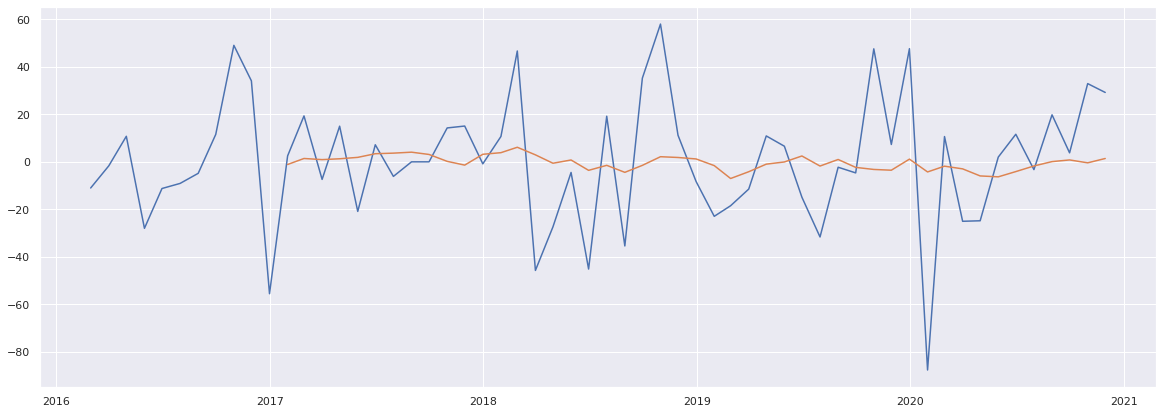

In [ ]:
_ = plt.plot(dfm['NO2'].diff())
_ = plt.plot(dfm['NO2'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dicky_fuller_test(dfm.NO2.diff().dropna())

--------------------NO2------------------------------
Data is stationary
TEST STATISTIC            -7.811025e+00
P-VALUE                    7.069367e-12
LAGS-USED                  0.000000e+00
N. OF OBSERVATIONS USED    5.700000e+01
CRITICAL VAL (1%)         -3.550670e+00
CRITICAL VAL (5%)         -2.913766e+00
CRITICAL VAL (10%)        -2.594624e+00
dtype: float64


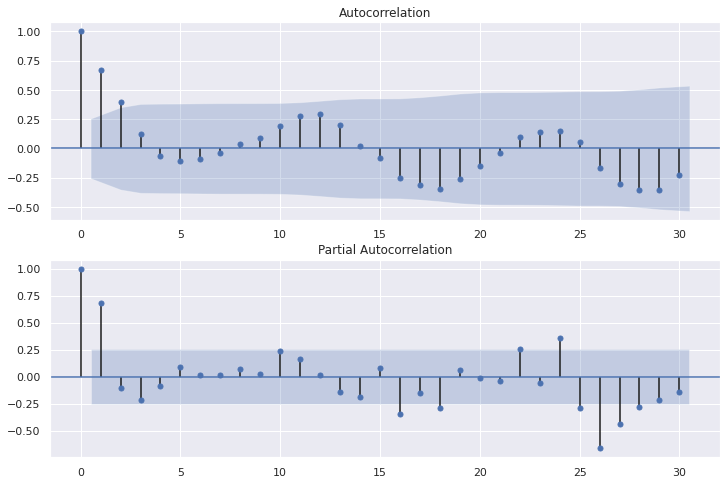

In [ ]:
plotting_cf(dfm.NO2)

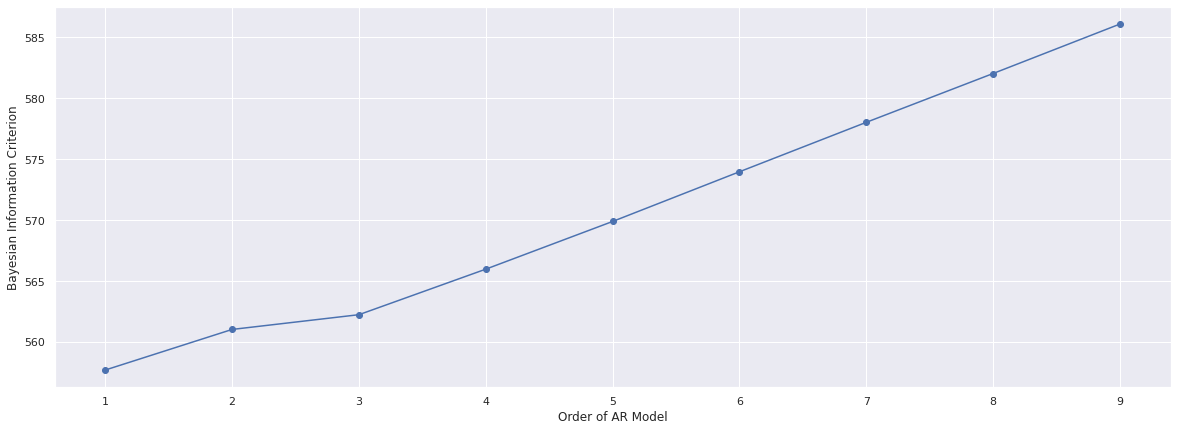

In [ ]:
bic_plot(dfm.NO2)

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const        87.874937
ar.L1.NO2     0.671691
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    NO2   No. Observations:                   59
Model:                     ARMA(1, 0)   Log Likelihood                -272.737
Method:                       css-mle   S.D. of innovations             24.499
Date:                Wed, 09 Dec 2020   AIC                            551.474
Time:                        05:35:20   BIC                            557.707
Sample:                    01-31-2016   HQIC                           553.907
                         - 11-30-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8749      9.411      9.338      0.000      69.431     106.319
ar.L1.NO2      0.6717      0.095      7.107      0.000       0.486       0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4888           +0.0000j            1.4888            0.0000
-----------------------------------------------------------------------------
"""

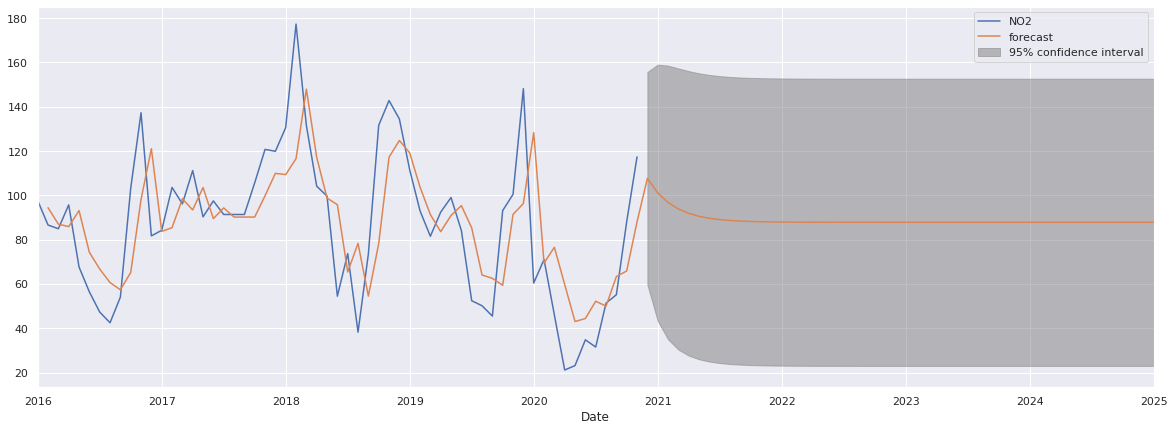

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Toluene2
2020-12-01,4.604753,124.352051,124.352051,107.705445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.153717
2021-01-01,3.980880,97.751794,97.751794,101.194918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.305954
2021-02-01,3.939214,76.216166,76.216166,96.821853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.387630
2021-03-01,3.898612,50.037011,50.037011,93.884503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.143922
2021-04-01,3.715268,30.289489,30.289489,91.911510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.613889


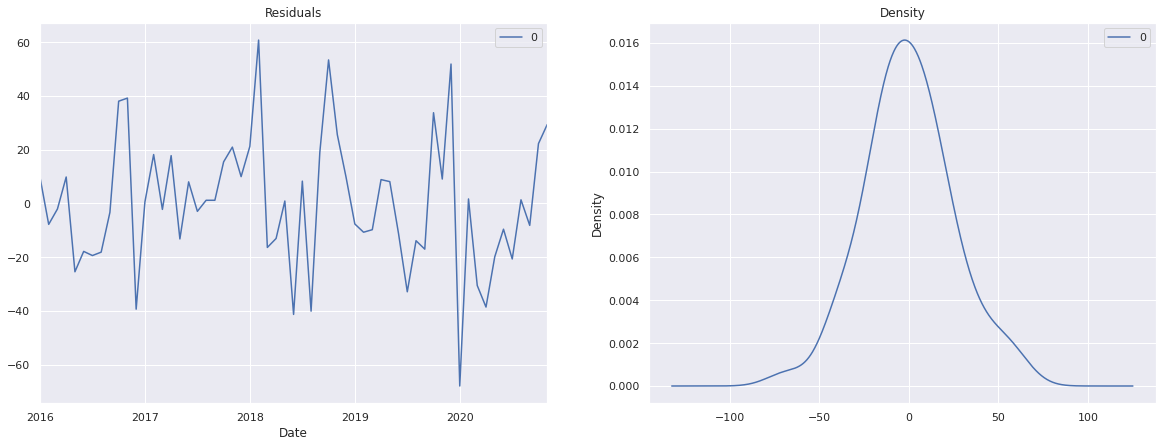

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#NOX

In [ ]:
dicky_fuller_test(dfm.NOx)

--------------------NOx------------------------------
Data is not stationary
TEST STATISTIC             -0.497749
P-VALUE                     0.892455
LAGS-USED                  11.000000
N. OF OBSERVATIONS USED    47.000000
CRITICAL VAL (1%)          -3.577848
CRITICAL VAL (5%)          -2.925338
CRITICAL VAL (10%)         -2.600774
dtype: float64


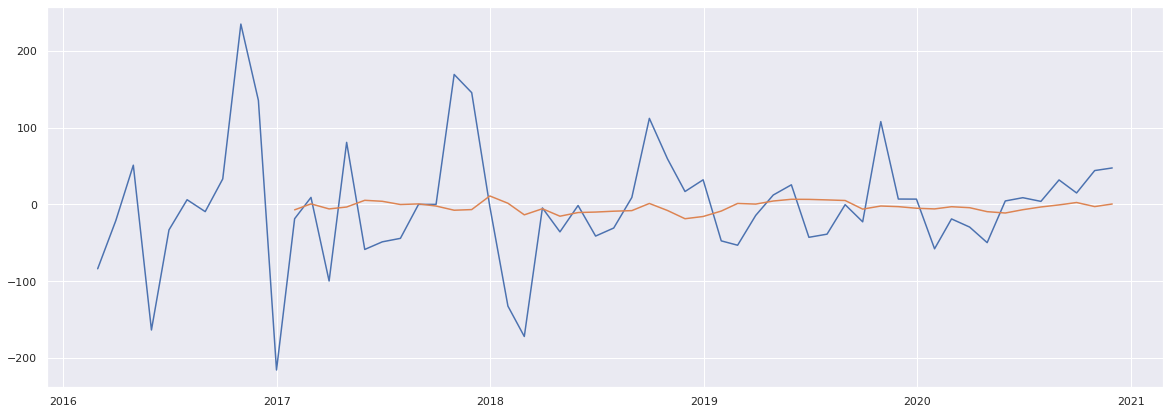

In [ ]:
_ = plt.plot(dfm['NOx'].diff())
_ = plt.plot(dfm['NOx'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NOx_Diff'] = dfm['NOx'] - dfm['NOx'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NOx.diff().dropna())

--------------------NOx------------------------------
Data is stationary
TEST STATISTIC             -5.407231
P-VALUE                     0.000003
LAGS-USED                  10.000000
N. OF OBSERVATIONS USED    47.000000
CRITICAL VAL (1%)          -3.577848
CRITICAL VAL (5%)          -2.925338
CRITICAL VAL (10%)         -2.600774
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


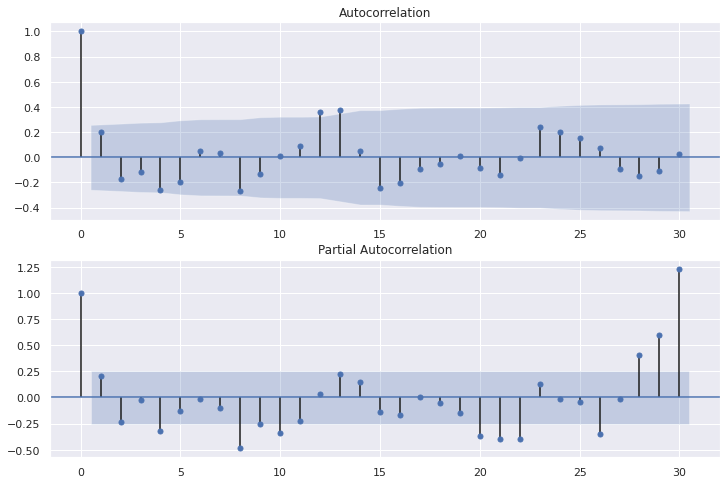

In [ ]:
plotting_cf(dfm.NOx.diff().dropna())

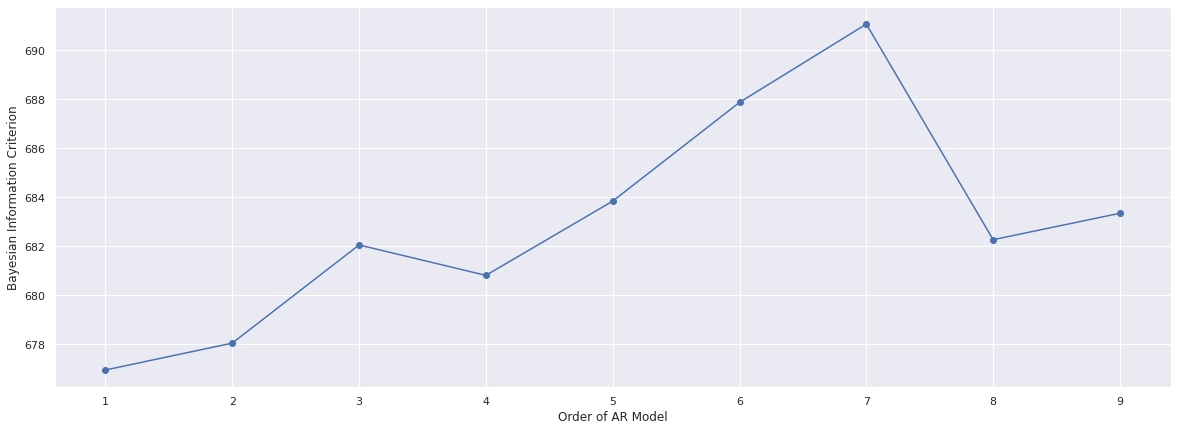

In [ ]:
bic_plot(dfm.NOx.diff().dropna())

In [ ]:
model=ARIMA(dfm.NOx,order=(1,1,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const         -3.327745
ar.L1.D.NOx    0.203438
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.NOx   No. Observations:                   58
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -332.385
Method:                       css-mle   S.D. of innovations             74.550
Date:                Wed, 09 Dec 2020   AIC                            670.770
Time:                        05:36:03   BIC                            676.951
Sample:                    02-29-2016   HQIC                           673.178
                         - 11-30-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.3277     12.236     -0.272      0.787     -27.309      20.654
ar.L1.D.NOx     0.2034      0.129      1.576      0.121      -0.050       0.456
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9155           +0.0000j            4.9155            0.0000
-----------------------------------------------------------------------------
"""

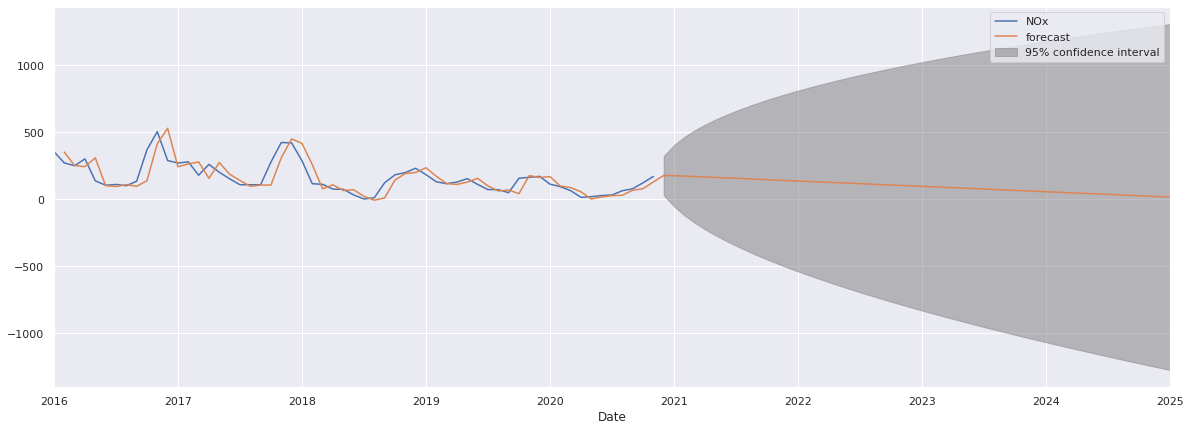

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NOx'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NOx'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

,Benzene,Toluene,NO,NO2,NOx,PM2.5,PM10,RH,WS,WD,Ozone,Toluene2
2020-12-01,4.604753,124.352051,124.352051,107.705445,177.326757,NaN,NaN,NaN,NaN,NaN,NaN,43.153717
2021-01-01,3.980880,97.751794,97.751794,101.194918,176.101716,NaN,NaN,NaN,NaN,NaN,NaN,36.305954
2021-02-01,3.939214,76.216166,76.216166,96.821853,173.201741,NaN,NaN,NaN,NaN,NaN,NaN,33.387630
2021-03-01,3.898612,50.037011,50.037011,93.884503,169.961020,NaN,NaN,NaN,NaN,NaN,NaN,32.143922
2021-04-01,3.715268,30.289489,30.289489,91.911510,166.650979,NaN,NaN,NaN,NaN,NaN,NaN,31.613889


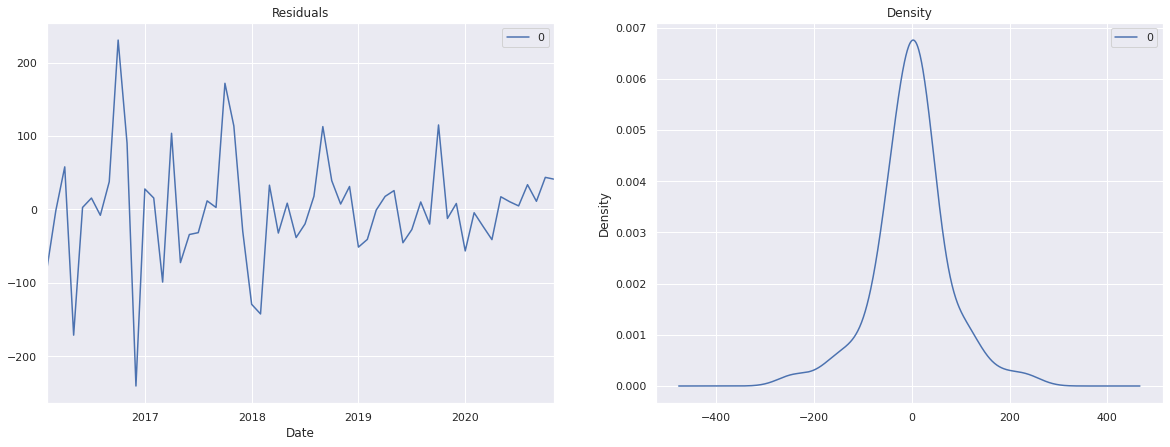

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#PM2.5

In [ ]:
dicky_fuller_test(dfm['PM2.5'])

--------------------PM2.5------------------------------
Data is not stationary
TEST STATISTIC             -0.934744
P-VALUE                     0.776316
LAGS-USED                  11.000000
N. OF OBSERVATIONS USED    47.000000
CRITICAL VAL (1%)          -3.577848
CRITICAL VAL (5%)          -2.925338
CRITICAL VAL (10%)         -2.600774
dtype: float64


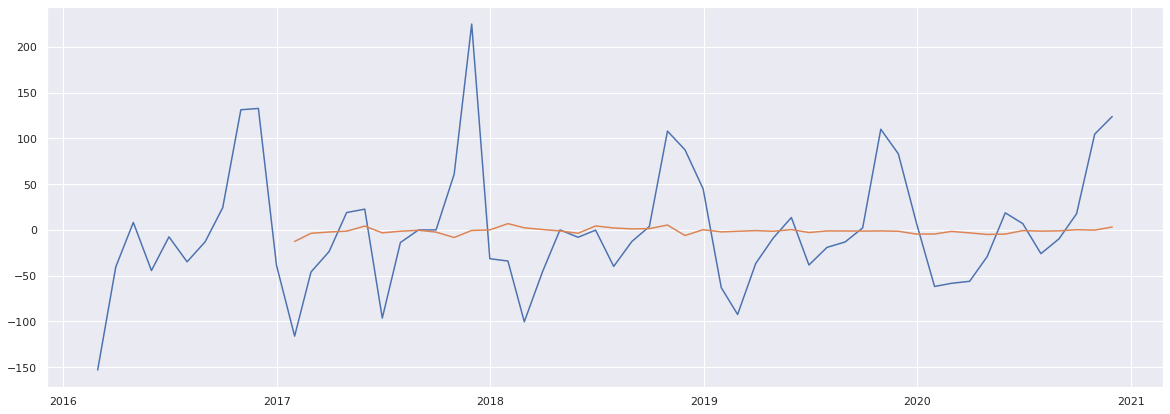

In [ ]:
_ = plt.plot(dfm['PM2.5'].diff())
_ = plt.plot(dfm['PM2.5'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm['PM2.5'].diff().dropna())

--------------------PM2.5------------------------------
Data is stationary
TEST STATISTIC            -6.634799e+00
P-VALUE                    5.597617e-09
LAGS-USED                  1.000000e+01
N. OF OBSERVATIONS USED    4.700000e+01
CRITICAL VAL (1%)         -3.577848e+00
CRITICAL VAL (5%)         -2.925338e+00
CRITICAL VAL (10%)        -2.600774e+00
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


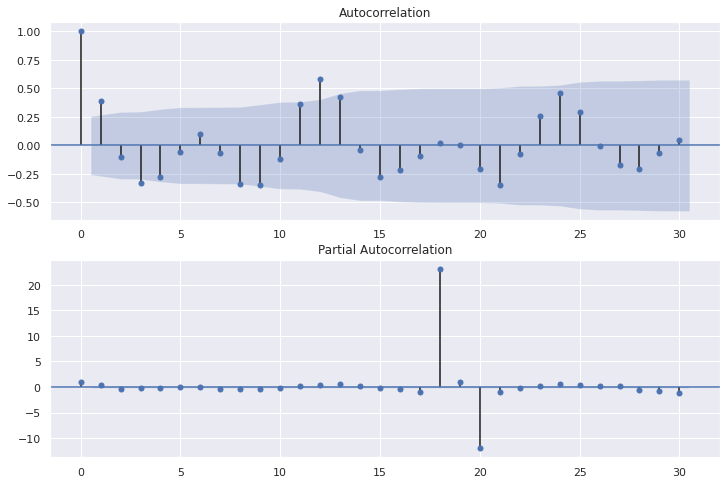

In [ ]:
plotting_cf(dfm['PM2.5'].diff().dropna())

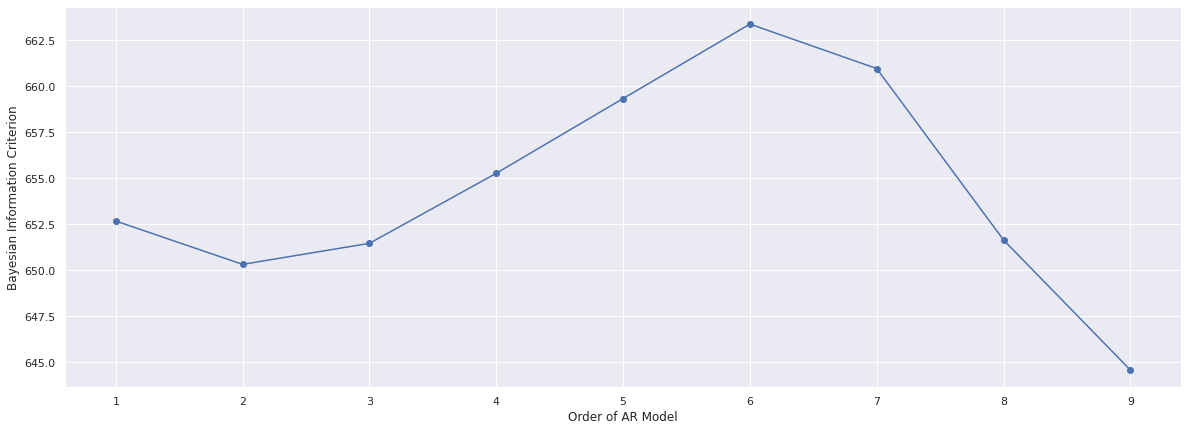

In [ ]:
bic_plot(dfm['PM2.5'].diff().dropna())

In [ ]:
model=ARIMA(dfm['PM2.5'],order=(9,1,1))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const           -1.074301
ar.L1.D.PM2.5    0.397611
ar.L2.D.PM2.5   -0.412504
ar.L3.D.PM2.5   -0.230806
ar.L4.D.PM2.5   -0.296609
ar.L5.D.PM2.5   -0.273703
ar.L6.D.PM2.5   -0.101112
ar.L7.D.PM2.5   -0.265951
ar.L8.D.PM2.5   -0.288812
ar.L9.D.PM2.5   -0.349606
ma.L1.D.PM2.5   -0.736417
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.PM2.5   No. Observations:                   58
Model:                 ARIMA(9, 1, 1)   Log Likelihood                -291.261
Method:                       css-mle   S.D. of innovations             33.703
Date:                Wed, 09 Dec 2020   AIC                            606.522
Time:                        05:38:23   BIC                            631.247
Sample:                    02-29-2016   HQIC                           616.153
                         - 11-30-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0743      0.476     -2.258      0.029      -2.007      -0.142
ar.L1.D.PM2.5     0.3976      0.148      2.687      0.010       0.108       0.688
ar.L2.D.PM2.5    -0.4125      0.135     -3.050      0.004      -0.678      -0.147
ar.L3.D.PM2.5    -0.2308      0.139     -1.660      0.104      -0.503       0.042
ar.L4.D.PM2.5    -0.2966      0.147     -2.021      0.049      -0.584      -0.009
ar.L5.D.PM2.5    -0.2737      0.144     -1.906      0.063      -0.555       0.008
ar.L6.D.PM2.5    -0.1011      0.146     -0.695      0.491      -0.386       0.184
ar.L7.D.PM2.5    -0.2660      0.138     -1.925      0.060      -0.537       0.005
ar.L8.D.PM2.5    -0.2888      0.132     -2.192      0.033      -0.547      -0.031
ar.L9.D.PM2.5    -0.3496      0.141     -2.472      0.017      -0.627      -0.072
ma.L1.D.PM2.5    -0.7364      0.107     -6.877      0.000      -0.946      -0.527
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8667           -0.5083j            1.0047           -0.0844
AR.2            0.8667           +0.5083j            1.0047            0.0844
AR.3            0.5025           -0.8858j            1.0184           -0.1679
AR.4            0.5025           +0.8858j            1.0184            0.1679
AR.5           -0.2324           -1.1359j            1.1595           -0.2821
AR.6           -0.2324           +1.1359j            1.1595            0.2821
AR.7           -1.2357           -0.0000j            1.2357           -0.5000
AR.8           -0.9320           -0.8809j            1.2824           -0.3795
AR.9           -0.9320           +0.8809j            1.2824            0.3795
MA.1            1.3579           +0.0000j            1.3579            0.0000
-----------------------------------------------------------------------------
"""

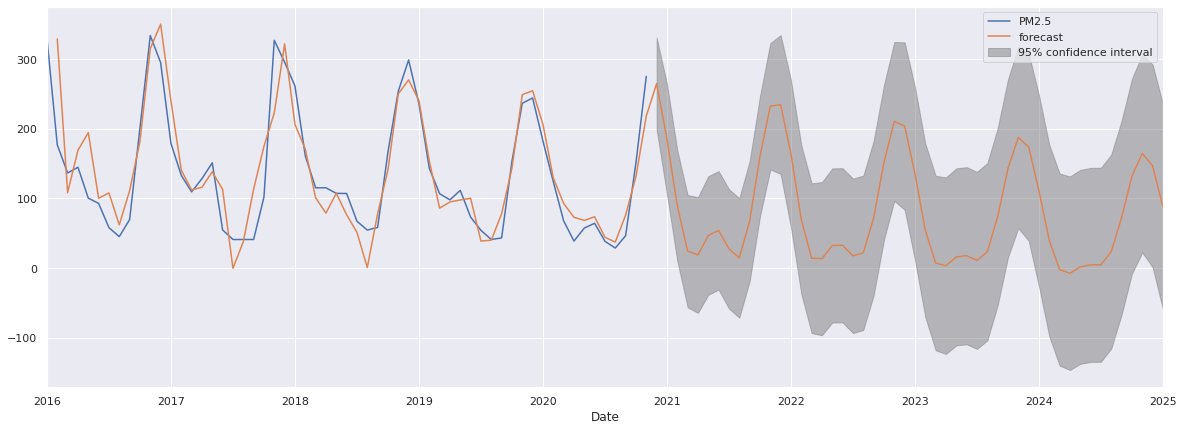

In [ ]:
fig, ax = plt.subplots()
ax = dfm['PM2.5'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['PM2.5'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

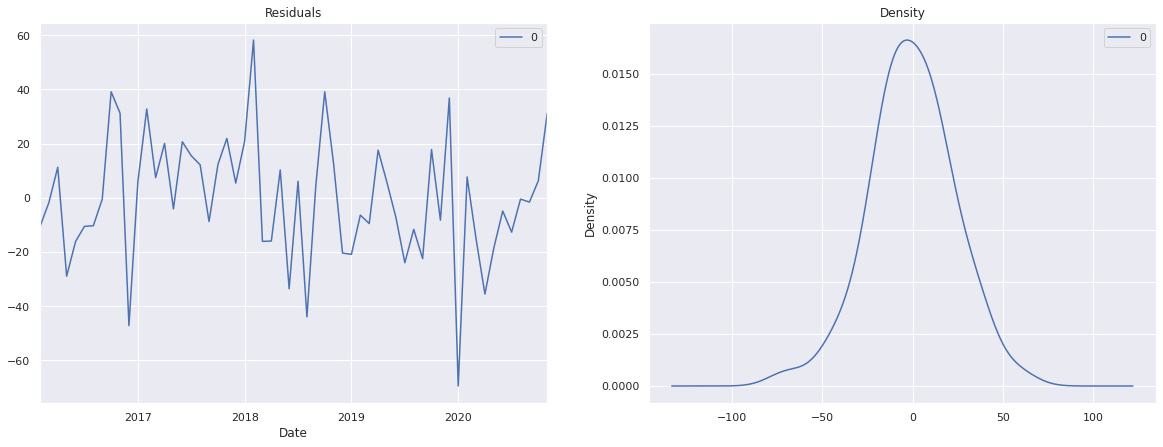

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#PM10


In [ ]:
dicky_fuller_test(dfm['PM10'])

--------------------PM10------------------------------
Data is stationary
TEST STATISTIC             -4.164372
P-VALUE                     0.000757
LAGS-USED                   1.000000
N. OF OBSERVATIONS USED    57.000000
CRITICAL VAL (1%)          -3.550670
CRITICAL VAL (5%)          -2.913766
CRITICAL VAL (10%)         -2.594624
dtype: float64


In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

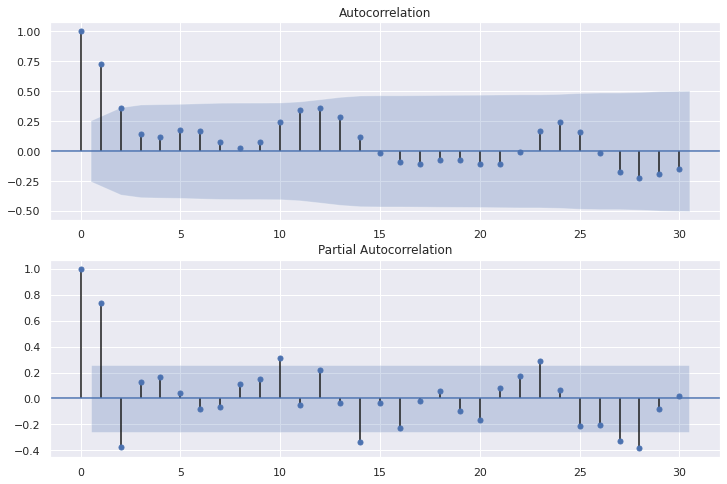

In [ ]:
plotting_cf(dfm['PM10'])

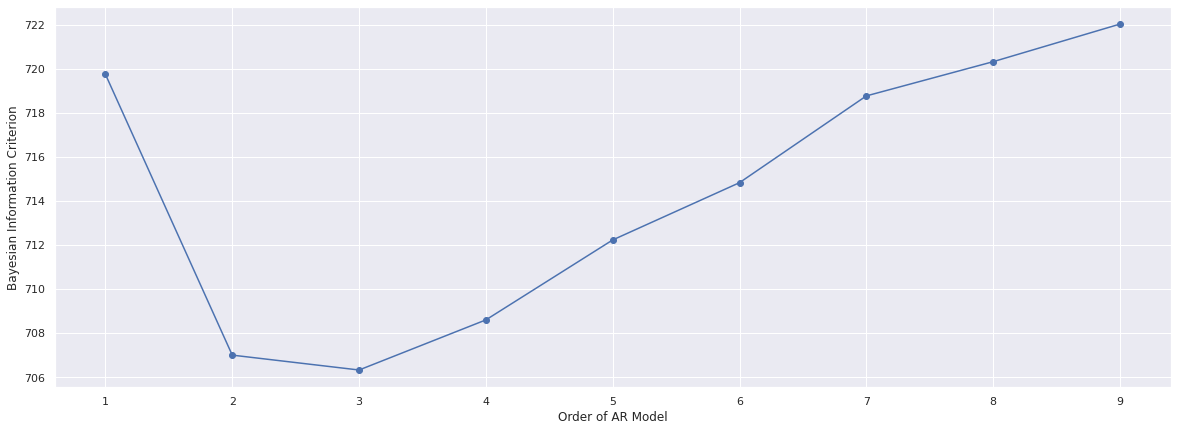

In [ ]:
bic_plot(dfm['PM10'])

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

const         341.058517
ar.L1.PM10      1.604991
ar.L2.PM10     -1.223739
ar.L3.PM10      0.465579
ma.L1.PM10     -0.283123
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   PM10   No. Observations:                   59
Model:                     ARMA(3, 1)   Log Likelihood                -342.512
Method:                       css-mle   S.D. of innovations             79.028
Date:                Wed, 09 Dec 2020   AIC                            697.023
Time:                        05:41:18   BIC                            709.488
Sample:                    01-31-2016   HQIC                           701.889
                         - 11-30-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        341.0585     46.148      7.391      0.000     250.610     431.507
ar.L1.PM10     1.6050      0.271      5.917      0.000       1.073       2.137
ar.L2.PM10    -1.2237      0.337     -3.636      0.001      -1.883      -0.564
ar.L3.PM10     0.4656      0.173      2.699      0.009       0.127       0.804
ma.L1.PM10    -0.2831      0.282     -1.006      0.319      -0.835       0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2452           -0.0000j            1.2452           -0.0000
AR.2            0.6916           -1.1165j            1.3134           -0.1617
AR.3            0.6916           +1.1165j            1.3134            0.1617
MA.1            3.5320           +0.0000j            3.5320            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#RH

In [ ]:
dicky_fuller_test(dfm.NO2)

In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

In [ ]:
plotting_cf(dfm.NO_Diff.dropna())

In [ ]:
bic_plot()

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#WS

In [ ]:
dicky_fuller_test(dfm.NO2)

In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

In [ ]:
plotting_cf(dfm.NO_Diff.dropna())

In [ ]:
bic_plot()

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#WD

In [ ]:
dicky_fuller_test(dfm.NO2)

In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

In [ ]:
plotting_cf(dfm.NO_Diff.dropna())

In [ ]:
bic_plot()

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#Ozone


In [ ]:
dicky_fuller_test(dfm.NO2)

In [ ]:
_ = plt.plot(dfm['NO'].diff())
_ = plt.plot(dfm['NO'].diff().rolling(window=12).mean())
plt.show()

In [ ]:
dfm['NO_Diff'] = dfm['NO'] - dfm['NO'].shift(1)
dfm.head()

In [ ]:
dicky_fuller_test(dfm.NO_Diff.dropna())

In [ ]:
plotting_cf(dfm.NO_Diff.dropna())

In [ ]:
bic_plot()

In [ ]:
model=ARIMA(dfm.NO2,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)
model_fit.summary()

In [ ]:
fig, ax = plt.subplots()
ax = dfm['NO2'].plot(ax=ax)
fig = model_fit.plot_predict(start=1, end='2025-1', ax=ax, plot_insample=False)
plt.show()

In [ ]:
future_datest_df['NO2'] = model_fit.forecast(steps = 61)[0]
future_datest_df.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()